In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [2]:
sales = [210,220,230,300,310,305,280,290,295,310,320,330,220,225,235,310,315,310,285,295,300,315,325,335]

In [3]:
dates = pd.date_range(start='2022-01-01',periods=len(sales),freq='MS')
df = pd.Series(sales,index=dates)

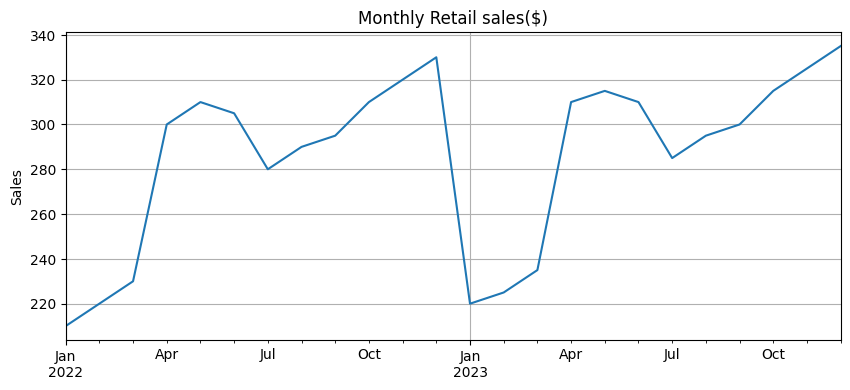

In [4]:
df.plot(title='Monthly Retail sales($)',figsize=(10,4))
plt.ylabel('Sales')
plt.grid()
plt.show()

In [5]:
#create model
model = ExponentialSmoothing(df,trend='add',seasonal='add',seasonal_periods=12)
fit = model.fit()

In [6]:
#Forecast next 12 months
forecast = fit.forecast(24)

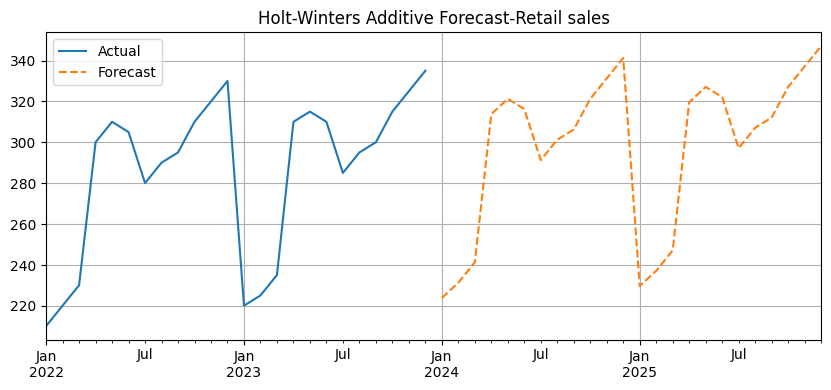

In [7]:
#Plot actual and forecasted values
plt.figure(figsize=(10,4))
df.plot(label='Actual')
forecast.plot(label='Forecast',linestyle='--')
plt.title('Holt-Winters Additive Forecast-Retail sales')
plt.legend()
plt.grid()
plt.show()

electronics data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [9]:
#simulated electronics demand data
#monthly demand
np.random.seed(42)

In [10]:
months=pd.date_range(start='2021-01-01',periods=36,freq='MS')

In [11]:
#trend + seaonality + noise
demand = (500 +#base demand
           np.linspace(0,300,36) + #upward trend
          50 * np.sin(2*np.pi*months.month/12)+ #seasonality(1-year cycle)
          np.random.normal(0,20,36) #random noise
          )

In [12]:
df = pd.Series(demand,index=months)
df.name = 'Monthly Electronics Demand'

<Axes: >

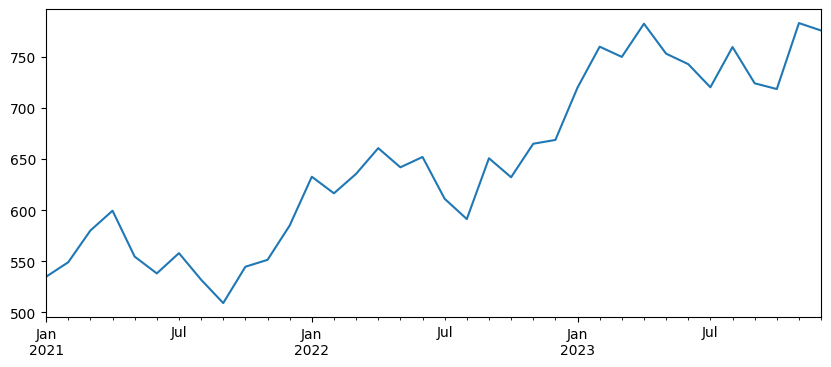

In [13]:
#plot actual demand
plt.figure(figsize=(10,4))
df.plot()


In [14]:
#apply holt-winters forecasting(additive)
model = ExponentialSmoothing(df,trend='add',seasonal='add',seasonal_periods=12)
fit = model.fit()

In [15]:
#Forecast for next 12 months
forecast = fit.forecast(12)

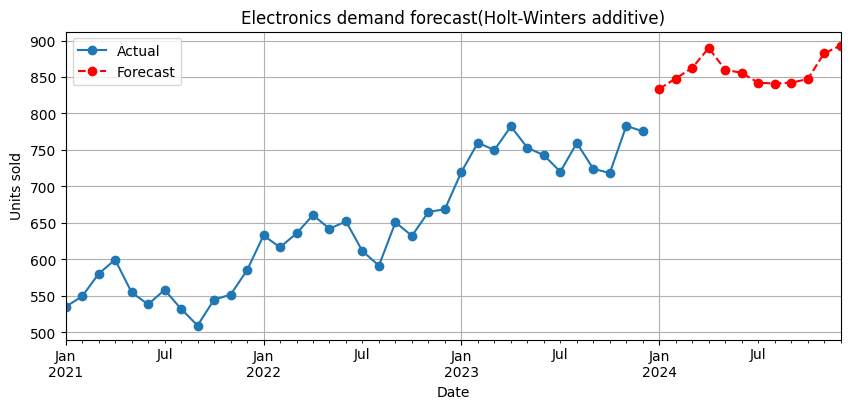

In [16]:
#Plot actual and forecasted demand
plt.figure(figsize=(10,4))
df.plot(label='Actual',marker='o')
forecast.plot(label='Forecast',marker='o',linestyle='--',color='red')
plt.title('Electronics demand forecast(Holt-Winters additive)')
plt.xlabel('Date')
plt.ylabel('Units sold')
plt.legend()
plt.grid()
plt.show()

Energy comsumption prediction(Multiplicative)

In [17]:
energy = [310,280,275,260,240,230,220,225,240,280,300,330,352,295,285,270,250,240,230,235,255,290,310,340]
dates = pd.date_range(start='2022-01-01',periods=len(energy),freq='MS')
df2 = pd.Series(energy,index=dates)

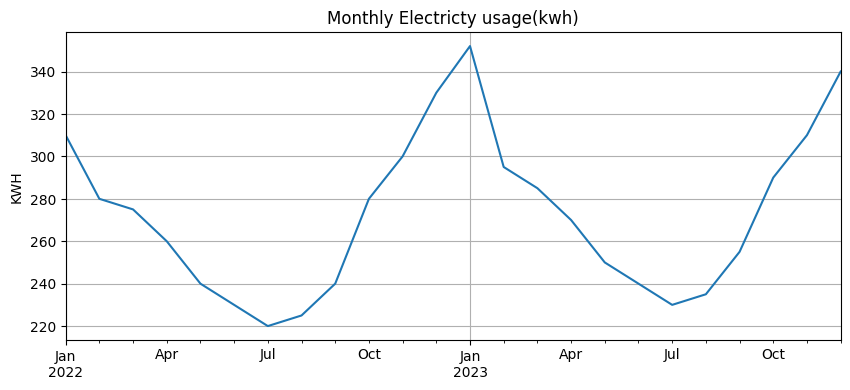

In [18]:
df2.plot(title='Monthly Electricty usage(kwh)',figsize=(10,4))
plt.ylabel('KWH')
plt.grid()
plt.show()

In [19]:
#Holt-Winters Multiplicative
model2 = ExponentialSmoothing(df2,trend='add',seasonal='mul',seasonal_periods=12)
fit2 = model2.fit()

In [20]:
#forecast
forecast2 = fit2.forecast(12)

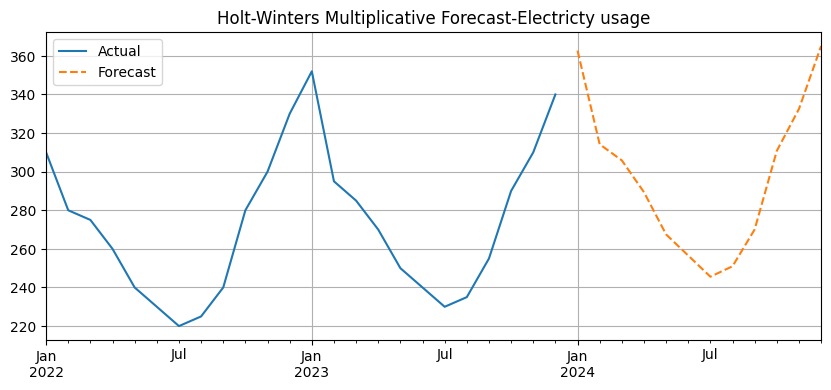

In [21]:
#plot electricty usage
plt.figure(figsize=(10,4))
df2.plot(label='Actual')
forecast2.plot(label='Forecast',linestyle='--')
plt.title('Holt-Winters Multiplicative Forecast-Electricty usage')
plt.legend()
plt.grid()
plt.show()

Holt-Winter Kashmir Tourism data

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [23]:
#monthly tourist data
np.random.seed(10)

In [24]:
months = pd.date_range(start='2019-01-01',periods=60,freq='MS')

In [25]:
#base + trend + seasonal variation(eg: high in may-july and dec-jan)
base = 10000
trend = np.linspace(0,5000,60) #gradual increase in tourism
seasonal_pattern = np.sin(2*np.pi*months.month/12) * 2000 # seasonal effect
noise = np.random.normal(0,800,60)

In [26]:
visitors = base + trend + seasonal_pattern + noise
df = pd.Series(visitors,index=months)
df.name = 'Monthly Kashmir visitors'

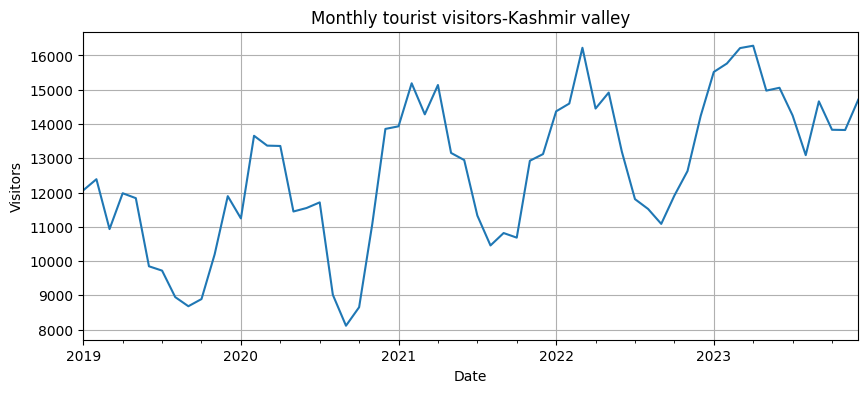

In [27]:
#plot actual data
plt.figure(figsize=(10,4))
df.plot()
plt.title('Monthly tourist visitors-Kashmir valley')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.grid()
plt.show()

In [28]:
#apply holt-winters(additive)
model = ExponentialSmoothing(df,trend='add',seasonal='mul',seasonal_periods=12)
fit = model.fit()


In [29]:
#forecast next 12 months
forecast = fit.forecast(12)

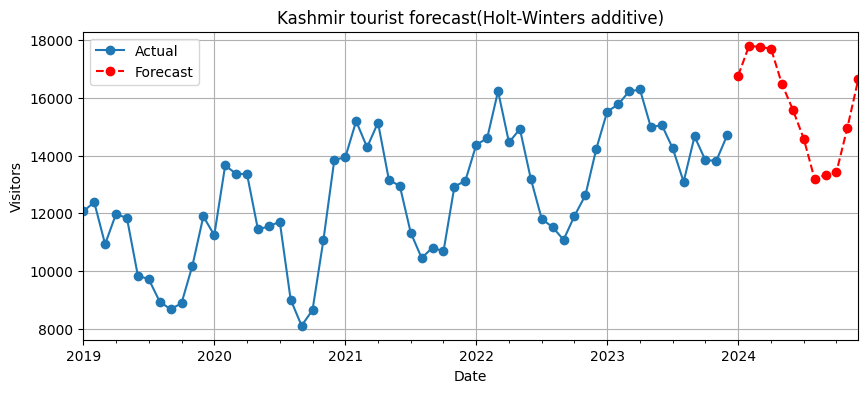

Forecasted Tourist Visits(next 12 months)
2024-01-01    16768
2024-02-01    17799
2024-03-01    17752
2024-04-01    17701
2024-05-01    16481
2024-06-01    15591
2024-07-01    14589
2024-08-01    13187
2024-09-01    13331
2024-10-01    13430
2024-11-01    14960
2024-12-01    16636
Freq: MS, dtype: int64


In [30]:
#plot actual vs forecast data
plt.figure(figsize=(10,4))
df.plot(label='Actual',marker='o')
forecast.plot(label='Forecast',marker='o',linestyle='--',color='red')
plt.title('Kashmir tourist forecast(Holt-Winters additive)')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.legend()
plt.grid()
plt.show()
print("Forecasted Tourist Visits(next 12 months)")
print(forecast.round(0).astype(int))